# THARAKADATTA D HEGDE
# B22ES007
#PCA AND LDA


**QUESTION 1**


In [ ]:
from sklearn.datasets import fetch_lfw_people

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Loading the Data


In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [ ]:
x = lfw_people.data
n_samples,h,w = lfw_people.images.shape
y = lfw_people.target
n_features = x.shape[1]
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [ ]:
#function to plot the images. derived this function from the sample code given
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

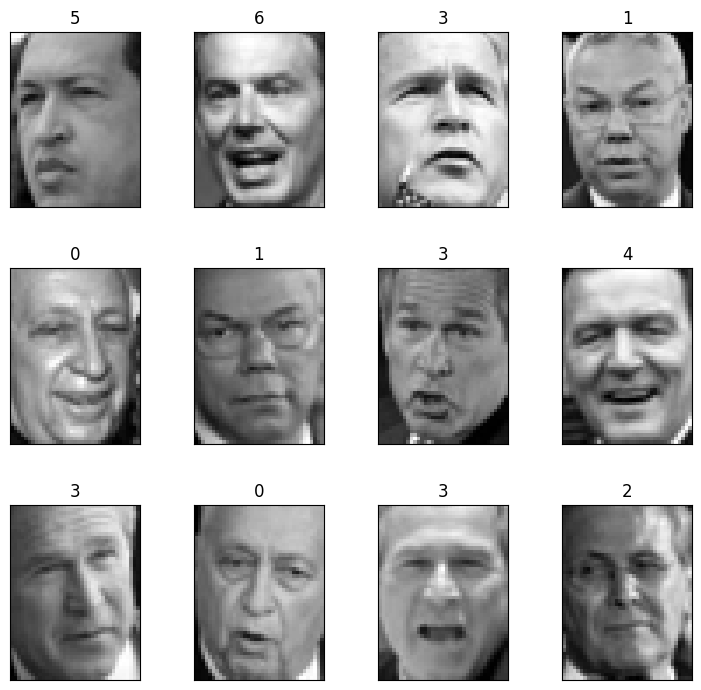

In [ ]:
plot_gallery(x,y,h,w)

SPLITTING THE DATASET INTO TRAINING AND TESTING SET

In [ ]:
#splitting the data to 20%testing set and rest as the training set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


**NORMALIZATION**

In [ ]:
#Used Min-Max scaling for rescaling the data
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

**IMPLEMENTING PCA**

In [ ]:
#implementing the PCA on a random n_components value. Here I have taken n_component = 30
from sklearn.decomposition import PCA
n =30

pca=PCA(n_components=n, whiten=True).fit(x_train)
eigenfaces =pca.components_.reshape((n,h,w))

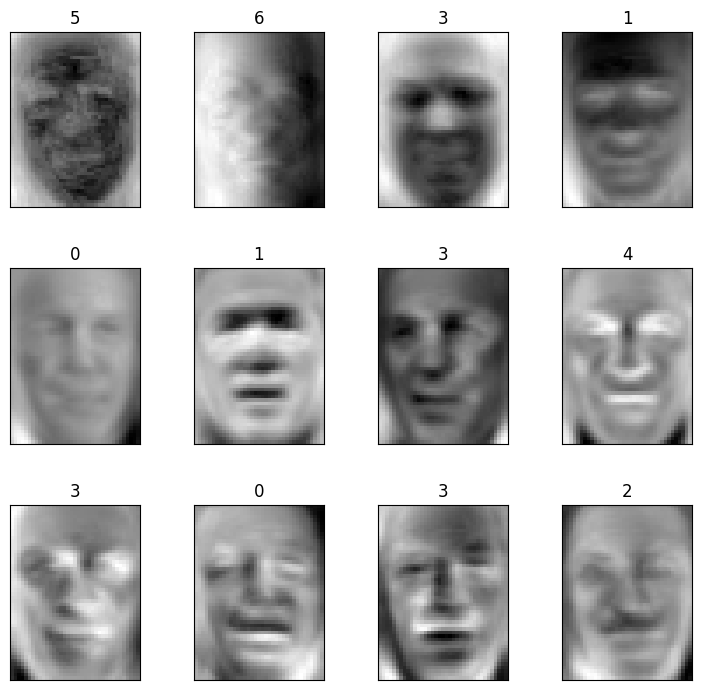

In [ ]:
#visualising the data
plot_gallery(eigenfaces,y,h,w)

In [ ]:
#implementing PCA for a range of No of Proncipal Components to find the change in variance
var = []
num = np.arange(50,1000,50)

for i in num:
  pca=PCA(n_components=i, whiten=True).fit(x_train)
  cum_var = pca.explained_variance_ratio_.sum()
  var.append(cum_var)



In [ ]:
length = len(var)
var_col = np.zeros([length,2])
for i in range(length):
  var_col[i][0]= var[i]
  var_col[i][1] = num[i]


Text(0.5, 1.0, 'Principal Components v/s Variance Graph')

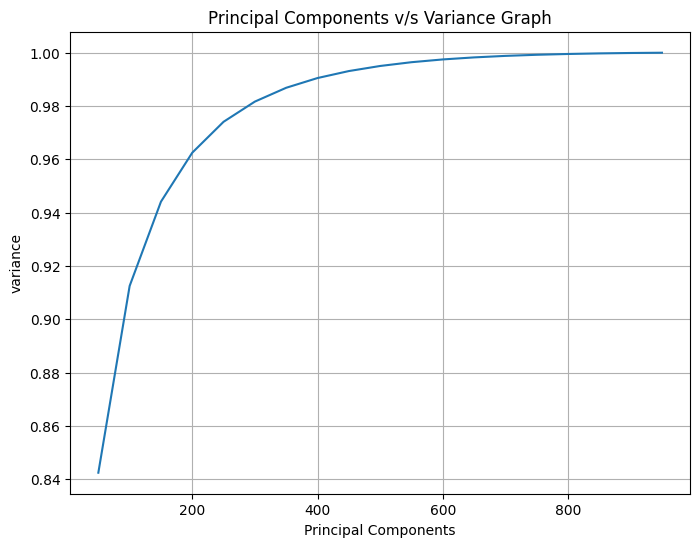

In [ ]:
#plotting the value of the no of components and variance
plt.figure(figsize=(8, 6))
plt.plot(num,var)
plt.xlabel("Principal Components")
plt.ylabel("variance")
plt.grid(True)
plt.title("Principal Components v/s Variance Graph")

In [ ]:
#We normally choose no of principal with variance greater than equal 95%. Here , I have choosen 96% as variance
req_var = 0.96
for i in range(len(var)):
  if(round(var_col[i][0],2) == 0.96):
    req_pc = var_col[i][1]
    break

print(req_pc)

200.0


In [ ]:
#reducing the data to 200 principal components
n = 200
pca=PCA(n_components = n, whiten=True).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

eigenfaces = pca.components_.reshape((n,h,w))

EIGENFACES

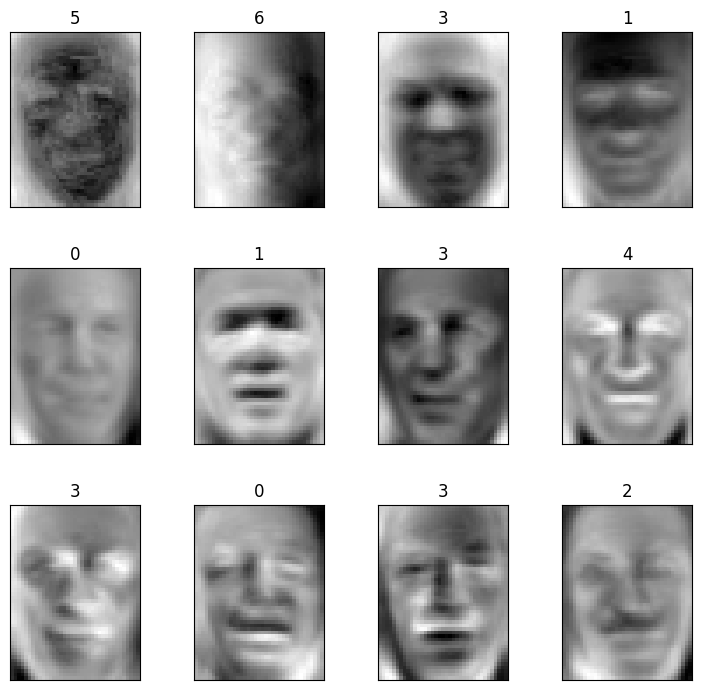

In [ ]:
#visualising the data with 200 principal components
plot_gallery(eigenfaces,y,h,w)

IMPLEMENTING LDA


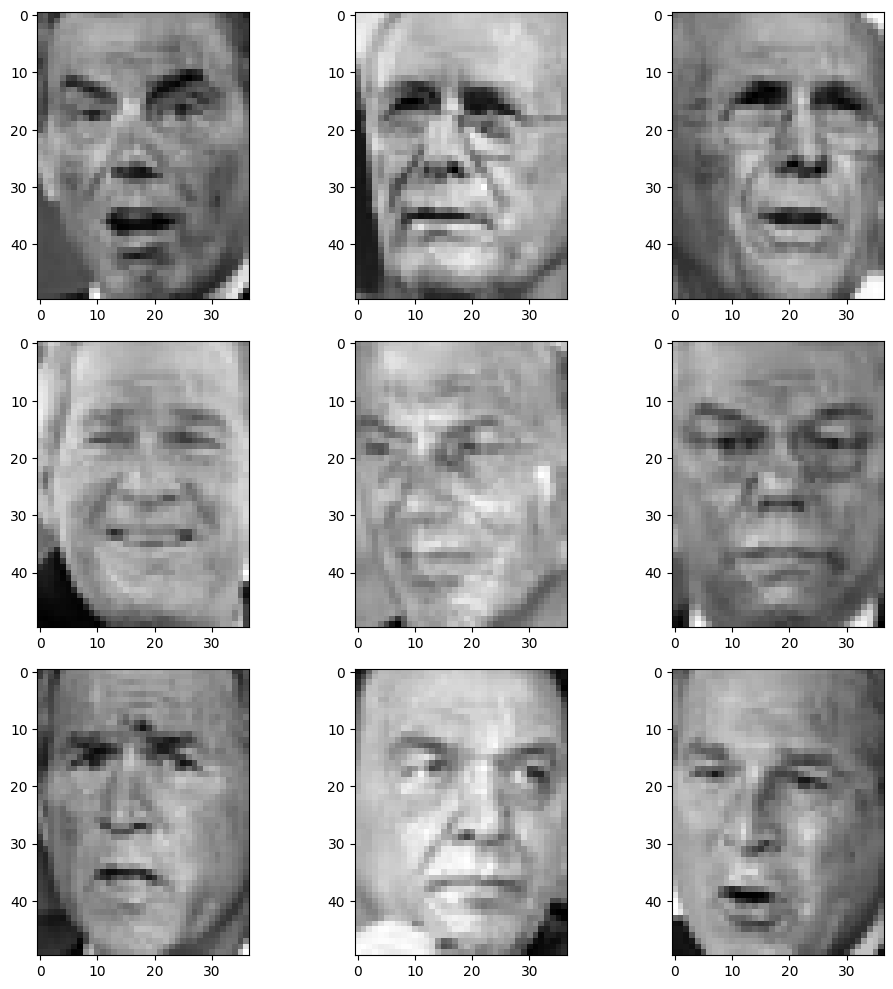

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=n_classes-1)
x_train_lda = lda.fit_transform(x_train,y_train)
x_test_lda = lda.transform(x_test)
img_size = lfw_people.images[0].shape
components = x_train.reshape(-1, *img_size)


fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, comp in enumerate(components[:9]):
    axs[i//3, i%3].imshow(comp, cmap='gray')
plt.tight_layout()
plt.show()

**KNN IMPLEMENTATION**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)

KNN.fit(x_train_pca,y_train)
y_pred_pca = KNN.predict(x_test_pca)

score_pca = KNN.score(x_test_pca,y_test)

KNN.fit(x_train_lda,y_train)
y_pred_lda = KNN.predict(x_test_lda)

score_lda = KNN.score(x_test_lda,y_test)

In [ ]:
print(score_pca)

0.6356589147286822


In [ ]:
print(score_lda)

0.6782945736434108


CLASSIFICATION REPORT(PRECISION,RECALL,F1-SCORE,SUPPORT)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_pca, target_names=target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.27      0.43        11
     Colin Powell       0.82      0.57      0.68        47
  Donald Rumsfeld       0.62      0.23      0.33        22
    George W Bush       0.58      0.97      0.73       119
Gerhard Schroeder       0.75      0.16      0.26        19
      Hugo Chavez       1.00      0.15      0.27        13
       Tony Blair       0.89      0.30      0.44        27

         accuracy                           0.64       258
        macro avg       0.81      0.38      0.45       258
     weighted avg       0.71      0.64      0.59       258



In [ ]:
print(classification_report(y_test,y_pred_lda, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.58      0.64      0.61        11
     Colin Powell       0.64      0.64      0.64        47
  Donald Rumsfeld       0.45      0.41      0.43        22
    George W Bush       0.80      0.79      0.79       119
Gerhard Schroeder       0.45      0.53      0.49        19
      Hugo Chavez       0.60      0.46      0.52        13
       Tony Blair       0.66      0.70      0.68        27

         accuracy                           0.68       258
        macro avg       0.60      0.60      0.59       258
     weighted avg       0.68      0.68      0.68       258



In [ ]:
x_train.shape

(1030, 1850)

#QUESTION 2


Loading the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_iml/vehicle-2.csv')
df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


**Exploratory Data Analysis**

In [ ]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [ ]:
mis_columns = ['circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance','scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2']
mean = df[mis_columns].mean()
df[mis_columns] = df[mis_columns].fillna(mean)
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [ ]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
count,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,846.000000
mean,5.879195e-16,-2.015724e-16,3.569511e-16,-2.435667e-16,-3.653500e-16,-1.637776e-16,-6.425120e-16,-7.223011e-16,-5.123299e-16,8.272868e-16,-2.099713e-16,-1.805753e-16,4.472388e-16,-3.359540e-17,9.028764e-17,-4.619368e-17,-1.303922e-15,1.526491e-15,0.977541
std,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,0.702130
min,-2.512695e+00,-1.929554e+00,-2.676807e+00,-1.943850e+00,-1.863407e+00,-1.428157e+00,-1.715171e+00,-1.912878e+00,-1.384896e+00,-2.067876e+00,-1.871006e+00,-1.448762e+00,-2.020160e+00,-1.801672e+00,-1.298768e+00,-1.411949e+00,-2.101239e+00,-1.968200e+00,0.000000
25%,-8.115196e-01,-7.876877e-01,-7.698171e-01,-8.354423e-01,-5.939619e-01,-3.408453e-01,-6.601779e-01,-1.016240e+00,-6.117389e-01,-7.581695e-01,-6.902804e-01,-6.875064e-01,-7.904120e-01,-7.298657e-01,-8.906252e-01,-8.517569e-01,-8.001144e-01,-7.239842e-01,0.000000
50%,-8.244465e-02,-1.351929e-01,-1.341537e-01,-2.660463e-02,-8.618388e-02,-1.233829e-01,-3.587513e-01,2.646712e-01,-2.251603e-01,-1.377823e-01,-3.073423e-01,-4.280841e-01,-2.181929e-02,-5.998678e-02,-7.434024e-02,-1.795266e-01,-1.495523e-01,1.839573e-01,1.000000
75%,7.681428e-01,6.804256e-01,1.010040e+00,7.822331e-01,4.215941e-01,3.115419e-01,8.770981e-01,6.489446e-01,9.345756e-01,7.583325e-01,9.052950e-01,8.350048e-01,7.160297e-01,3.419406e-01,5.378735e-01,7.167805e-01,6.636504e-01,7.219967e-01,1.000000
max,3.076880e+00,2.311663e+00,1.899969e+00,4.916292e+00,9.688542e+00,1.009735e+01,2.896657e+00,2.570312e+00,3.254047e+00,2.757358e+00,4.192180e+00,3.280379e+00,2.868089e+00,8.380488e+00,3.190800e+00,3.181625e+00,2.777977e+00,2.067095e+00,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    float64
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    float64
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    float64
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

<ipython-input-32-dcf6590f6f40>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, linewidth = 0.3)


<Axes: >

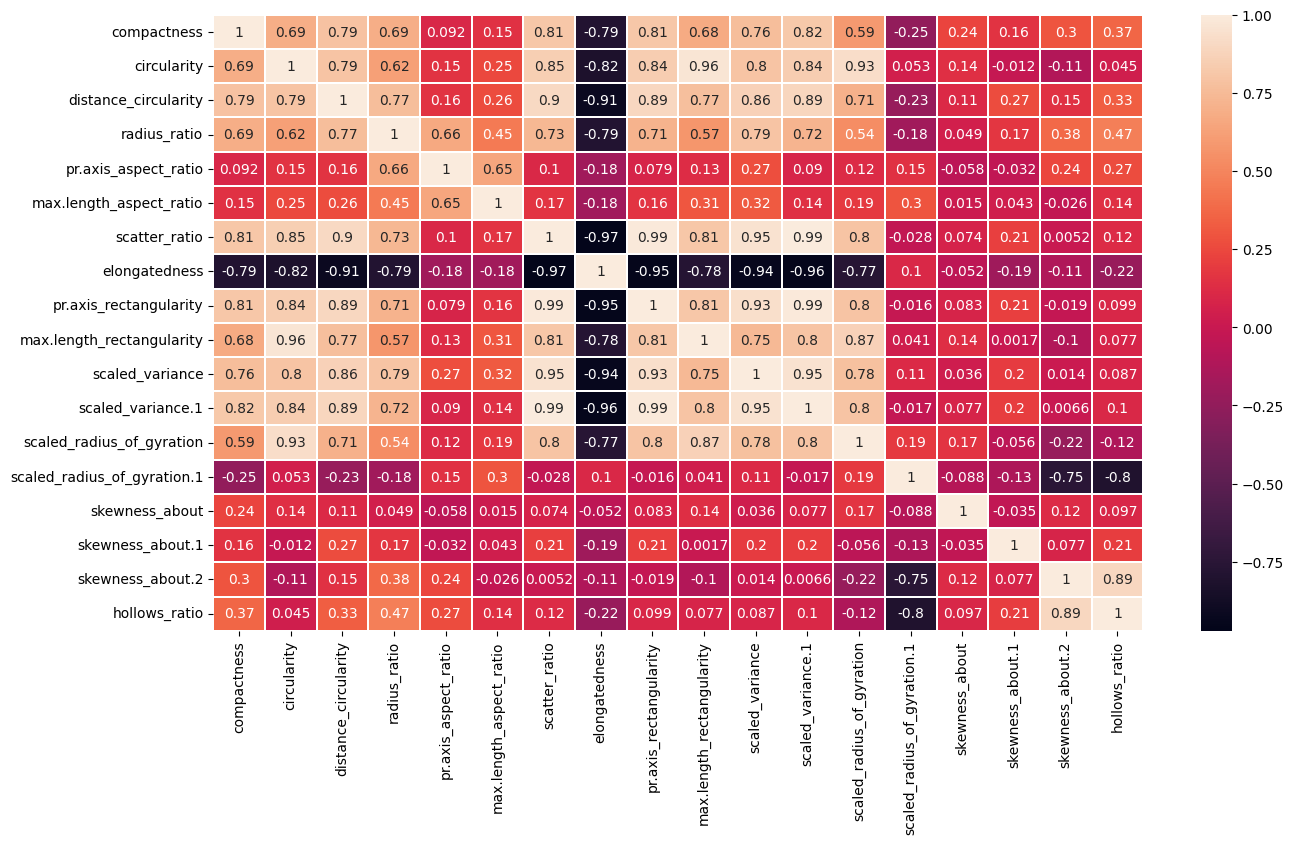

In [ ]:
#heatmap
import seaborn as sns
fig= plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(),annot=True, linewidth = 0.3)

**Encoding**

In [ ]:
df['class'].unique()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['class'].unique())
df['class'] = le.transform(df['class'])


**Normalization**

In [ ]:
required_column = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance','scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[required_column] = scaler.fit_transform(df[required_column])


**Splitting The Data**

In [ ]:
x = df.drop(columns = 'class')
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

IMPLEMENTING PCA


In [ ]:
#implementing PCA on a random value
n=2
pca=PCA(n_components=n, whiten=True).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

LogisticR = LogisticRegression().fit(x_train_pca,y_train)


In [ ]:
LogisticR.score(x_test_pca,y_test)

0.6058823529411764

In [ ]:
#Implementing PCA on range of values ranging from very low to very high
from sklearn.linear_model import LogisticRegression
ra = np.arange(2,15,1)
accuracy = []
for i in ra:
  n = i
  pca=PCA(n_components=n, whiten=True).fit(x_train)
  x_train_pca = pca.transform(x_train)
  x_test_pca = pca.transform(x_test)
  LogisticR = LogisticRegression().fit(x_train_pca,y_train)
  score = LogisticR.score(x_test_pca,y_test)
  accuracy.append(score)




In [ ]:
accuracy

[0.6058823529411764,
 0.6411764705882353,
 0.6352941176470588,
 0.6,
 0.7705882352941177,
 0.788235294117647,
 0.7764705882352941,
 0.888235294117647,
 0.8764705882352941,
 0.888235294117647,
 0.9,
 0.888235294117647,
 0.9]

IMPLEMENTING LDA

In [ ]:

a = np.arange(1,3,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
arr_2=[]
for i in a:
  lda = LDA(n_components=i)
  lda.fit(x_train,y_train)
  x_train_lda = lda.transform(x_train)
  x_test_lda = lda.transform(x_test)
  LogisticR = LogisticRegression().fit(x_train_lda,y_train)
  score = LogisticR.score(x_test_lda,y_test)
  arr_2.append(score)

GRAPH (LDA/PCA vs ACCURACY)

Text(0.5, 1.0, 'Accuracy v/s Principal Components')

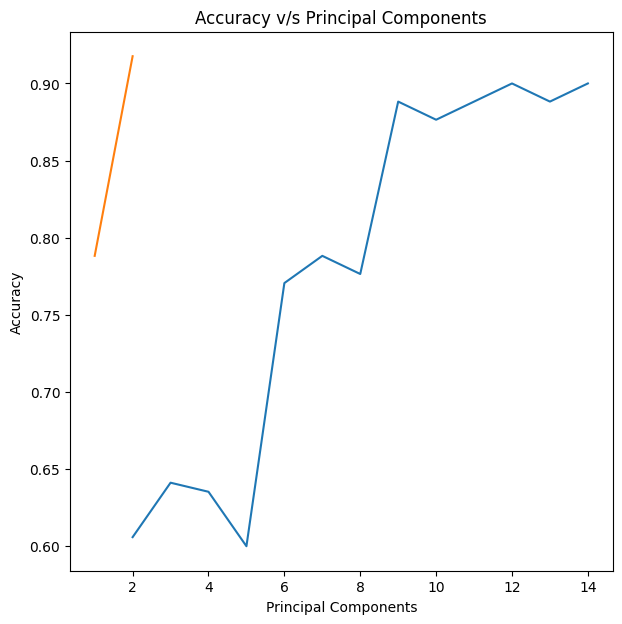

In [ ]:
  plt.figure(figsize=(7,7))
  plt.plot(ra,accuracy)
  plt.plot(a,arr_2)
  plt.xlabel("Principal Components")
  plt.ylabel("Accuracy")
  plt.title("Accuracy v/s Principal Components")